# Import библиотек

In [30]:
import numpy as np
from google.colab import files 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Загрузка данных на Google Drive


In [32]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


In [33]:
df = pd.read_csv('cars_moldova_clean.csv', delimiter = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


### Отображаем данные через pandas

In [34]:
num_columns, cat_columns = [], []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

print('Числовые колонки: ', num_columns)
print('Категориальные колонки: ', cat_columns)

Числовые колонки:  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year']
Категориальные колонки:  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']


<Figure size 864x864 with 0 Axes>

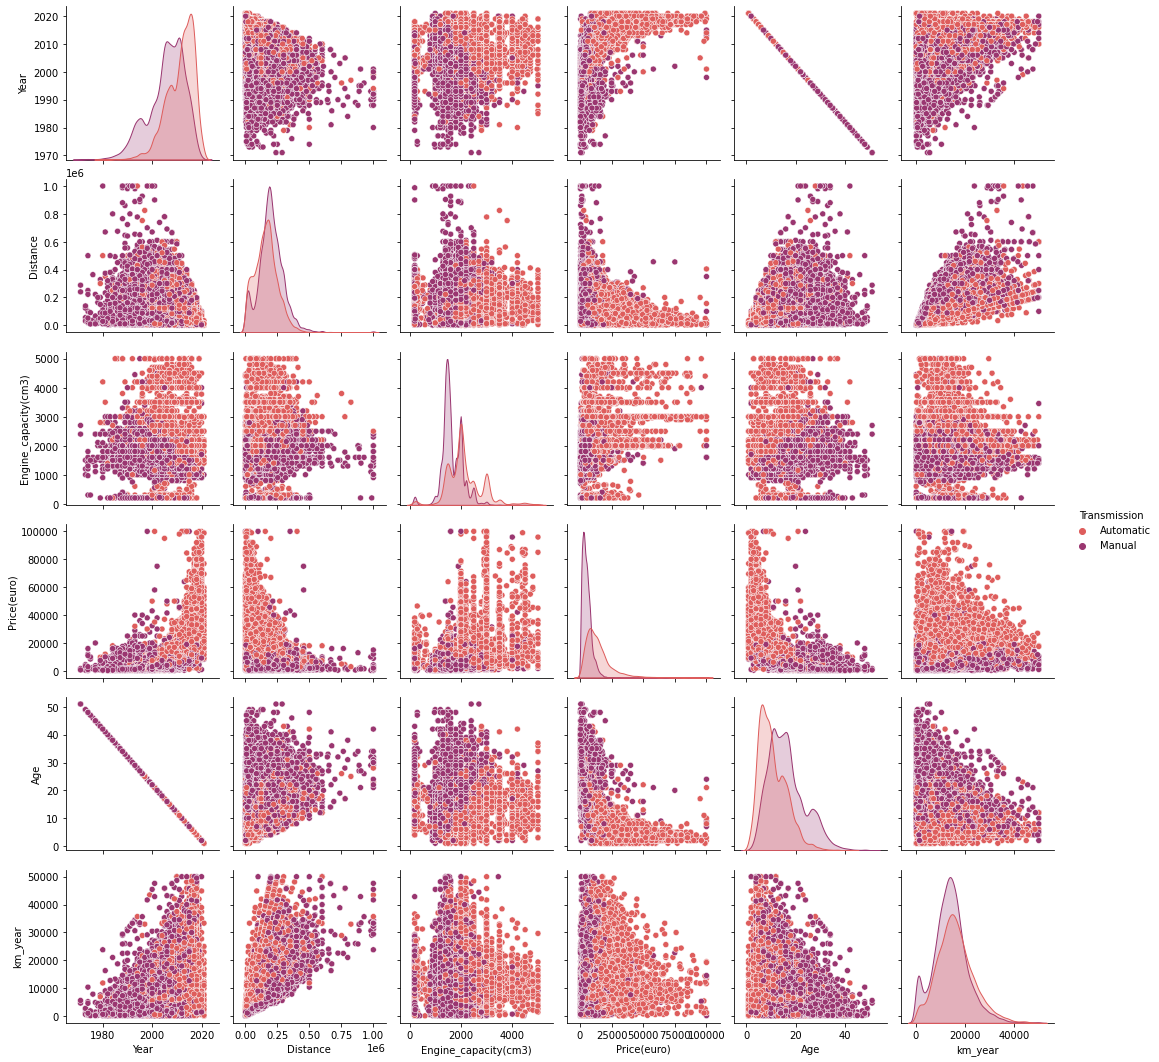

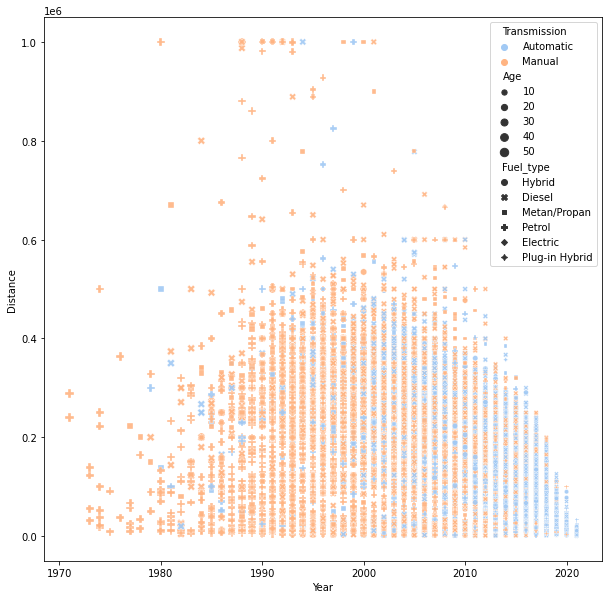

In [35]:
fig = plt.figure(figsize=(12, 12))
sns.pairplot(data = df, hue ='Transmission', palette='flare')
plt.figure(figsize=(10,10))

sns.scatterplot(    
    data=df,
    x='Year', y='Distance',
    hue='Transmission', 
    size = 'Age', alpha = 0.9,
             palette='pastel', style ='Fuel_type'
    )

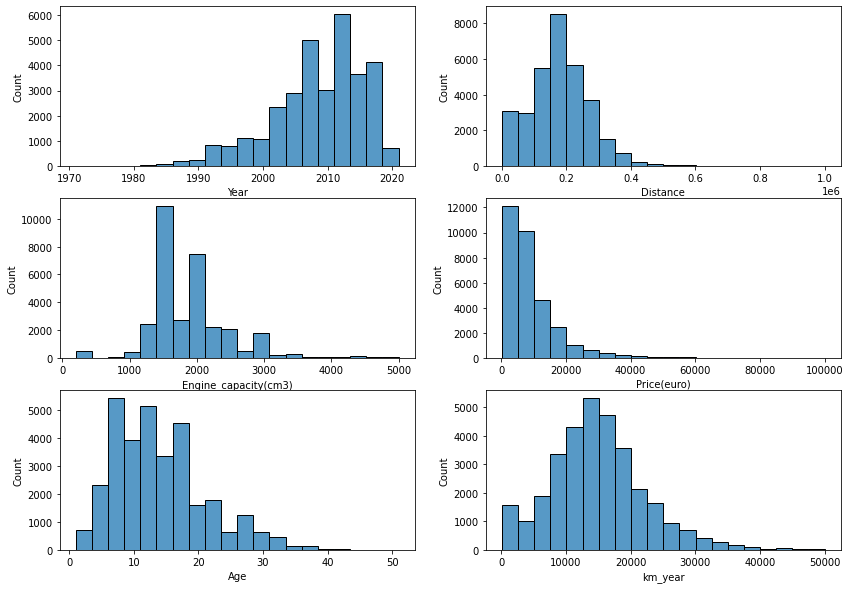

In [36]:
width = 2
height = int(np.ceil(len(num_columns) / width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(14, 10))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data=df, x=column_name, bins=20)

#### Обработка данных

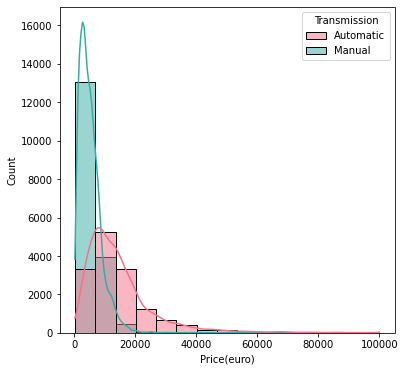

In [37]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()
DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)
fig = plt.figure(figsize=(6,6))
sns.histplot(data = df, x = 'Price(euro)', hue = 'Transmission', bins = 15, kde = True, palette='husl')

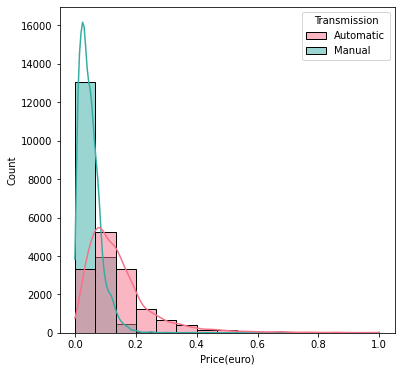

In [38]:
fig = plt.figure(figsize=(6,6))
sns.histplot(data = DF_norm, x = 'Price(euro)', hue = 'Transmission', bins = 15, kde = True, palette='husl')

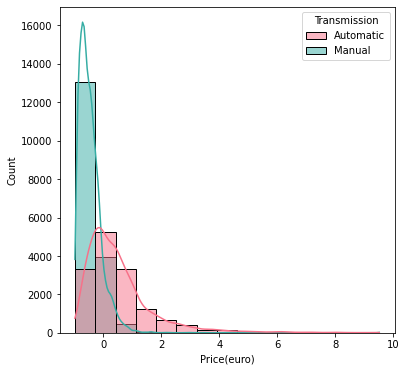

In [39]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns] - M) / STD
fig = plt.figure(figsize=(6,6))
sns.histplot(data = DF_scaled, x = 'Price(euro)', hue = 'Transmission', bins = 15, kde = True, palette='husl')

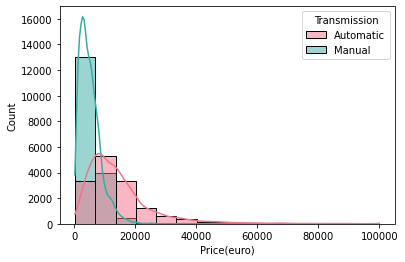

In [40]:
sns.histplot(data = df, x = 'Price(euro)', hue = 'Transmission', bins = 15, kde = True, palette='husl')

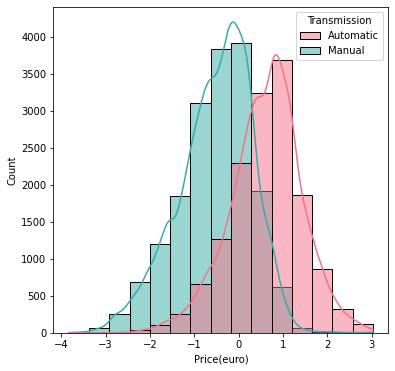

In [41]:
DF_power  = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns] - M) / STD
fig = plt.figure(figsize=(6,6))
sns.histplot(data = DF_power, x = 'Price(euro)', hue = 'Transmission', bins = 15, kde = True, palette='husl')

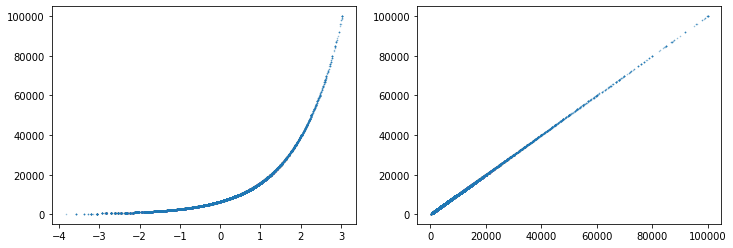

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(DF_power['Price(euro)'], df['Price(euro)'], '.', alpha=0.5, markersize=1)
plt.subplot(1, 2, 2)
plt.plot(df['Price(euro)'], df['Price(euro)'], '.', alpha=0.5, markersize=1)

###Добавляю доп признаки

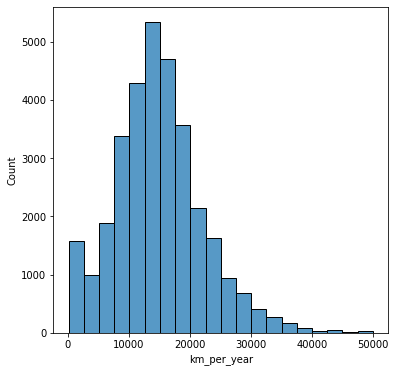

In [43]:
import datetime

current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year']
df['km_per_year'] = df['Distance'] / df['Age']
question_km = df[df['km_per_year'] > 5e4]
df = df.drop(question_km.index)
question_km = df[df['km_per_year'] < 100]
df = df.drop(question_km.index)
df = df.reset_index(drop=True)
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='km_per_year', bins=20)

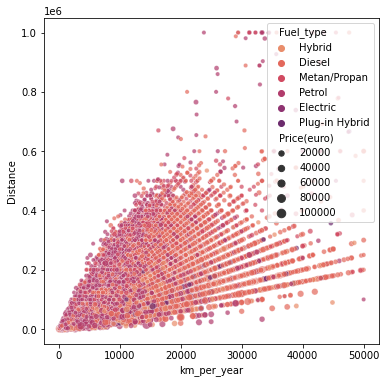

In [44]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df, 
    x='km_per_year', 
    y='Distance', 
    hue='Fuel_type', 
    size='Price(euro)', 
    alpha = 0.7, 
    palette='flare'
)

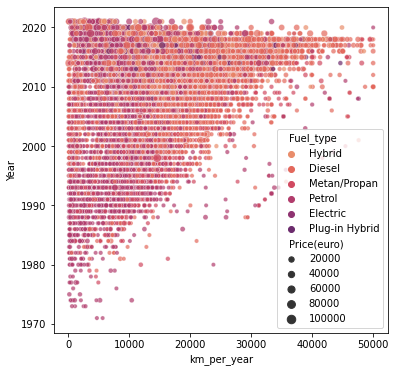

In [45]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df, 
    x='km_per_year', 
    y='Year', 
    hue='Fuel_type', 
    size='Price(euro)', 
    alpha = 0.7, 
    palette='flare'
)

In [46]:
km_per_year = lambda x: 'small' if x < 10000 else 'medium' if x < 30000 else 'large'
df['km_per_year_cat'] = df['km_per_year'].apply(km_per_year)

### Убираем аномалии

In [47]:
num_columns.append('km_per_year')
num_columns

['Year',
 'Distance',
 'Engine_capacity(cm3)',
 'Price(euro)',
 'Age',
 'km_year',
 'km_per_year']

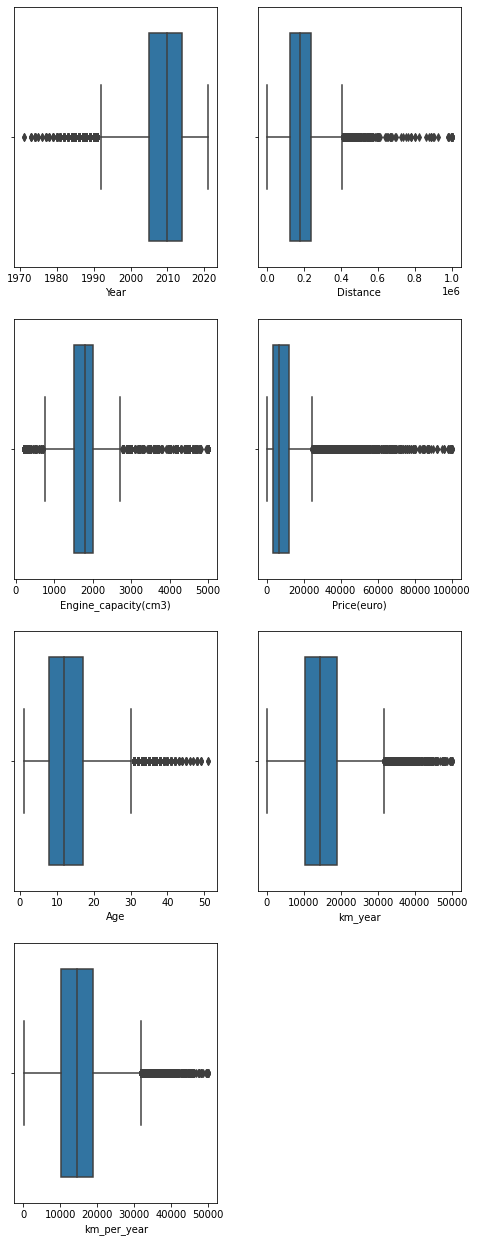

In [48]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,22))
for idx, column_name in enumerate(num_columns):
    plt.subplot(4, 2, idx + 1)
    sns.boxplot(data=df, x=column_name)

In [49]:
cm = sns.color_palette('vlag', as_cmap=True)
df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,km_per_year
Year,1.000000,-0.434240,-0.025886,0.551517,-1.000000,0.425819,0.425819
Distance,-0.434240,1.000000,0.067473,-0.347328,0.434240,0.462784,0.462784
Engine_capacity(cm3),-0.025886,0.067473,1.000000,0.382841,0.025886,-0.010412,-0.010412
Price(euro),0.551517,-0.347328,0.382841,1.000000,-0.551517,0.156816,0.156816
Age,-1.000000,0.434240,0.025886,-0.551517,1.000000,-0.425819,-0.425819
km_year,0.425819,0.462784,-0.010412,0.156816,-0.425819,1.000000,1.000000
km_per_year,0.425819,0.462784,-0.010412,0.156816,-0.425819,1.000000,1.000000


### Категориальные данные

In [50]:
cat_columns.append('km_per_year_cat')
cat_columns

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'km_per_year_cat']

In [51]:
df[cat_columns].nunique()

Make                44
Model              136
Style               12
Fuel_type            6
Transmission         2
km_per_year_cat      3
dtype: int64

In [52]:
counts = df.Make.value_counts()
counts

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

In [53]:
counts.median()
rare = counts[counts < 25]
rare_cheap = df[df.Make.isin(rare.index) & (df['Price(euro)'] <= 25000)].Make.value_counts()
rare_expensive = df[df.Make.isin(rare.index) & (df['Price(euro)'] > 25000)].Make.value_counts()
rare_dict = {}
for i in rare.index:
    print(i)
    if i in rare_cheap.index:
        rare_dict[i] = 'Rare_cheap'
    elif i in rare_expensive.index:
        rare_dict[i] = 'Rare_expensive'
    else:
        rare_dict[i] = 'Rare'
df.Make = df.Make.replace(rare_dict)
df.Make.value_counts()

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

#### Перевод признаков категорий к числовым

In [55]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')
for column in cat_columns:
    df_se[column] = df_se[column].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  km_per_year           32220 non-null  float64
 12  km_per_year_cat       32220 non-null  int8   
dtypes: float64(5), int16(1), int64(2), int8(5)
memory usage: 1.9 MB


In [56]:
df_se = df.copy()
if 'km_per_year_cat' not in cat_columns:
    cat_columns += ['km_per_year_cat']
df_se[cat_columns] = df_se[cat_columns].astype('category')
for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int8   
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  km_per_year           32220 non-null  float64
 12  km_per_year_cat       32220 non-null  int8   
dtypes: float64(5), int16(1), int64(2), int8(5)
memory usage: 1.9 MB


In [57]:
df_se.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_per_year,km_per_year_cat
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727,17727.272727,1
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000,16875.000000,1
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000,11000.000000,1
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000,12500.000000,1
4,23,126,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636,13636.363636,1


In [ ]:
sns.pairplot(data=df_se, hue='Transmission', palette='husl')

In [ ]:
df_se.to_csv('cars_moldova_cat_num.csv',index=False)
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()
df_ohe.info()
df_ohe.to_csv('cars_moldova_onehot.csv', index=False)